In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split # 분리하기
import matplotlib.pyplot as plt

In [4]:
bank= pd.read_csv("cs_data.csv", index_col='Unnamed: 0') # index 컬럼 변경 

In [5]:
bank # 1이 연체 한적있음, 0이없음

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
bank.shape # 10개의 컬럼, 1개의 목표변수

(150000, 11)

In [7]:
# 1 넘은 값에서 "RevolvingUtilizationOfUnsecuredLines"  1로 변경- 이상치 제거
bank.loc[bank['RevolvingUtilizationOfUnsecuredLines']>=1,"RevolvingUtilizationOfUnsecuredLines"]=1

In [8]:
(bank['RevolvingUtilizationOfUnsecuredLines']>1).sum() # 1 이상인거 확인

0

{'whiskers': [<matplotlib.lines.Line2D at 0x282cc1c4220>,
 'caps': [<matplotlib.lines.Line2D at 0x282cc1c4760>,
 'boxes': [<matplotlib.lines.Line2D at 0x282cc17bf40>],
 'medians': [<matplotlib.lines.Line2D at 0x282cc1c4ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x282cc1c4f40>],
 'means': []}

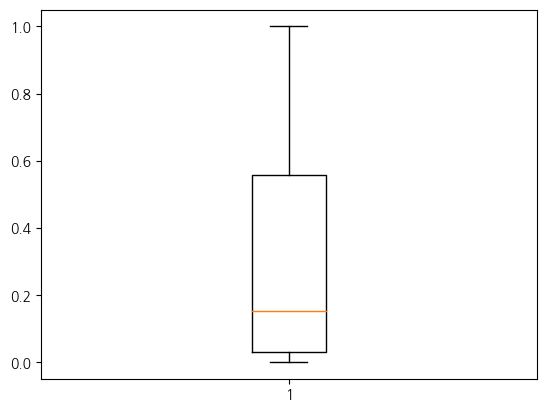

In [9]:
plt.boxplot(bank["RevolvingUtilizationOfUnsecuredLines"])

{'whiskers': [<matplotlib.lines.Line2D at 0x282cc2989a0>,
 'caps': [<matplotlib.lines.Line2D at 0x282cc298ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x282cc298820>],
 'medians': [<matplotlib.lines.Line2D at 0x282cc299420>],
 'fliers': [<matplotlib.lines.Line2D at 0x282cc2996c0>],
 'means': []}

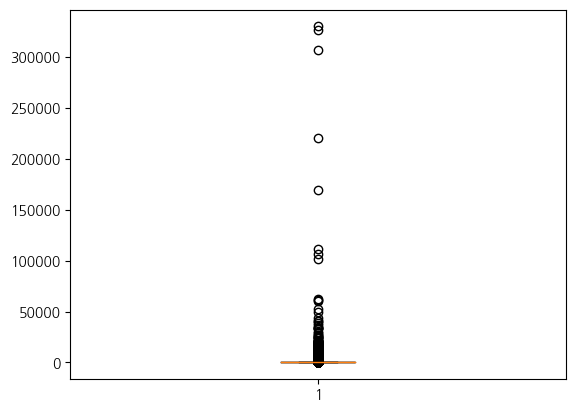

In [10]:
plt.boxplot(bank['DebtRatio'])

In [11]:
bank[bank['DebtRatio']>=1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
26,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149977,0,0.000627,76,0,60.000000,NaN,5,0,0,0,0.0
149978,0,0.236450,29,0,349.000000,NaN,3,0,0,0,0.0
149985,0,0.037548,84,0,25.000000,NaN,5,0,0,0,0.0
149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0


In [12]:
bank[bank['RevolvingUtilizationOfUnsecuredLines']>=1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
163,1,1.0,47,1,1.104301,5416.0,6,0,2,0,1.0
192,0,1.0,53,5,0.536704,3500.0,7,1,1,2,0.0
227,1,1.0,38,0,0.153500,3556.0,5,0,0,0,2.0
252,1,1.0,58,7,0.151957,3500.0,12,0,0,0,0.0
294,0,1.0,45,0,0.339333,8333.0,7,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149940,0,1.0,26,0,0.073220,6500.0,6,0,0,1,0.0
149956,1,1.0,41,2,0.845887,7500.0,12,0,4,1,0.0
149963,0,1.0,48,0,0.248896,2944.0,4,3,0,0,1.0
149965,0,1.0,63,0,0.608211,6015.0,8,0,1,0,0.0


In [13]:
bank.info()  # 수치형 데이터(연속형)

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [14]:
bank.isnull().sum() # 결측치가 수입, 부양자에 있음


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
bank['MonthlyIncome'].mean()  # 전체 월 수입의 평균 6670

6670.221237392844

In [16]:
bank.groupby('age')['MonthlyIncome'].mean()

age
0      6000.000000
21     1128.123077
22     1312.592705
23     1728.003883
24     2061.717791
          ...     
102    3358.500000
103     800.500000
105            NaN
107            NaN
109            NaN
Name: MonthlyIncome, Length: 86, dtype: float64

In [17]:
# bank[bank['MonthlyIncome'].isnull()]=bank.groupby('age')['MonthlyIncome'].mean()

In [18]:
# 하나 제거할 때
# bank.drop(bank[bank['age']==0].index)

In [19]:
bank[bank['age']==0]
# 0살,102살,105살,107살 제거 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [20]:
bank.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,0.319196,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,0.349481,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [21]:
bank[bank['RevolvingUtilizationOfUnsecuredLines']==50708]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [22]:
bank.groupby('age')['MonthlyIncome'].mean()

age
0      6000.000000
21     1128.123077
22     1312.592705
23     1728.003883
24     2061.717791
          ...     
102    3358.500000
103     800.500000
105            NaN
107            NaN
109            NaN
Name: MonthlyIncome, Length: 86, dtype: float64

In [23]:
# 제거할 행의 조건 리스트 생성
remove_conditions = [0, 105, 107,109]
# 조건에 해당하는 행 제거
bank = bank.drop(bank[bank['age'].isin(remove_conditions)].index)

In [24]:
bank.groupby('age')['MonthlyIncome'].mean()

age
21     1128.123077
22     1312.592705
23     1728.003883
24     2061.717791
25     2529.139272
          ...     
98     1867.333333
99     7457.333333
101    2274.500000
102    3358.500000
103     800.500000
Name: MonthlyIncome, Length: 82, dtype: float64

In [25]:
bank[bank['MonthlyIncome'].isnull()]#==bank.groupby('age')['MonthlyIncome'].mean()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [26]:
# 'MonthlyIncome' 열의 결측값을 'age' 그룹별 평균값으로 대체
bank['MonthlyIncome'].fillna(bank.groupby('age')['MonthlyIncome'].transform('mean'), inplace=True)

In [27]:
bank.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3921
dtype: int64

In [28]:
bank['NumberOfDependents'].nunique() #컬럼 개수

13

In [29]:
bank['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     86901
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [30]:
bank.groupby('MonthlyIncome')['age'].mean()

MonthlyIncome
0.0          48.337209
1.0          45.763636
2.0          54.500000
4.0          59.500000
5.0          73.000000
               ...    
835040.0     55.000000
1072500.0    44.000000
1560100.0    44.000000
1794060.0    68.000000
3008750.0    52.000000
Name: age, Length: 13676, dtype: float64

In [31]:
bank[bank['NumberOfDependents'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
9,0,0.116951,27,0,46.0,3247.634991,2,0,0,0,NaN
97,0,0.542243,48,2,10.0,7235.704395,2,0,0,0,NaN
110,0,0.041258,61,0,4739.0,7504.619978,11,0,4,0,NaN
160,0,0.000000,63,0,2.0,7513.625625,4,0,0,0,NaN
239,0,1.000000,28,0,0.0,3605.198666,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149827,0,0.027319,71,0,1419.0,6052.994224,13,0,1,0,NaN
149855,0,0.056589,75,0,8.0,5617.018605,3,0,0,0,NaN
149895,0,0.017904,55,0,1058.0,7839.782878,8,0,1,1,NaN
149949,0,0.055530,27,0,10.0,3247.634991,1,0,0,0,NaN


In [32]:
bank.groupby('age')['NumberOfDependents'].mean().isnull().sum()

0

In [33]:
bank[bank['NumberOfDependents'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
9,0,0.116951,27,0,46.0,3247.634991,2,0,0,0,NaN
97,0,0.542243,48,2,10.0,7235.704395,2,0,0,0,NaN
110,0,0.041258,61,0,4739.0,7504.619978,11,0,4,0,NaN
160,0,0.000000,63,0,2.0,7513.625625,4,0,0,0,NaN
239,0,1.000000,28,0,0.0,3605.198666,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149827,0,0.027319,71,0,1419.0,6052.994224,13,0,1,0,NaN
149855,0,0.056589,75,0,8.0,5617.018605,3,0,0,0,NaN
149895,0,0.017904,55,0,1058.0,7839.782878,8,0,1,1,NaN
149949,0,0.055530,27,0,10.0,3247.634991,1,0,0,0,NaN


In [34]:
# NumberOfDependents' 열의 결측값을 'age' 그룹별 평균값으로 대체 평균 값은 비율이라 올림 처리함 
bank['NumberOfDependents'].fillna(bank.groupby('age')['NumberOfDependents'].transform('mean').round(), inplace=True)

In [35]:
bank.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [36]:
bank['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     89422
1.0     27716
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [37]:
bank['NumberOfDependents'].unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [38]:
# data 분리
X=bank.drop(columns='SeriousDlqin2yrs')
y=bank['SeriousDlqin2yrs']

In [39]:
# !pip install -U imbalanced-learn

In [40]:
# under sampleing 
from imblearn.under_sampling import NearMiss

In [41]:
# X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0) # 분류 완료

# data 분리

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.4,random_state=0)

In [43]:
y_train.value_counts()

SeriousDlqin2yrs
0    83981
1     6016
Name: count, dtype: int64

In [44]:
y_test.value_counts()

SeriousDlqin2yrs
0    55988
1     4010
Name: count, dtype: int64

# 전처리 scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled=scaler.fit_transform(X_train)

In [48]:
X_test_scaled=scaler.transform(X_test)

# under sample

In [49]:
# Near Miss 적용
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train_scaled, y_train)

In [50]:
y_resampled.value_counts() # 값 벨유 맞춤

SeriousDlqin2yrs
0    6016
1    6016
Name: count, dtype: int64

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_resampled.shape, y_resampled.shape

((89997, 10), (59998, 10), (89997,), (59998,), (12032, 10), (12032,))

In [52]:
y_train.value_counts()

SeriousDlqin2yrs
0    83981
1     6016
Name: count, dtype: int64

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
tree = DecisionTreeClassifier(random_state=0) #  결정 트리 생성
tree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [55]:
pred_train= tree.predict(X_resampled)
pred_test=tree.predict(X_test_scaled)
proba_train= tree.predict_proba(X_resampled)
proba_test= tree.predict_proba(X_test_scaled)

In [56]:
proba_train

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [57]:
from metrics import print_metrics_classification,plot_confusion_matrix

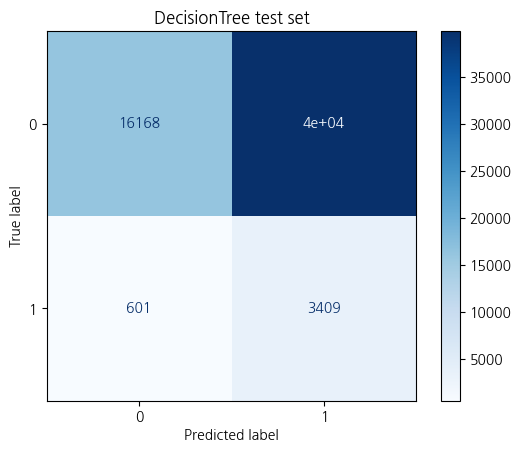

==========train==========
정확도(Accuracy): 0.9976728723404256
재현율(Recall) : 0.995844414893617
정밀도(Precision): 0.9994994994994995
F1 Score: 0.9976686094920899
AveagePrecision Score: 0.9999814263701741
ROC-AUC Score: 0.9999858947726277
==========test==========
정확도(Accuracy): 0.3262942098069936
재현율(Recall) : 0.8501246882793018
정밀도(Precision): 0.07885909921580421
F1 Score: 0.1443298969072165
AveagePrecision Score: 0.07703307956470626
ROC-AUC Score: 0.5694573200313499


In [58]:
plot_confusion_matrix(y_test, pred_test, title="DecisionTree test set")
print_metrics_classification(y_resampled,pred_train,proba_train[:,1],'train')

print_metrics_classification(y_test,pred_test,proba_test[:,1],"test")

In [483]:
#값: 1 (연체한 적 있음)양성, 0 (연체한 적 없음)음성

In [484]:
y_train.value_counts()  # 1이 연체 한적있음, 0이없음


SeriousDlqin2yrs
0    111975
1      8021
Name: count, dtype: int64

# 아무것도 없이 Decision

In [79]:
tree_= DecisionTreeClassifier(random_state=0) # 모델 생성 
tree.fit(X_train,y_train) # 학습 하기 

DecisionTreeClassifier(random_state=0)

In [80]:
pred_train=tree.predict(X_train)
pred_test=tree.predict(X_test) # 실제 데이터
proba_train= tree.predict_proba(X_train)
proba_test= tree.predict_proba(X_test)

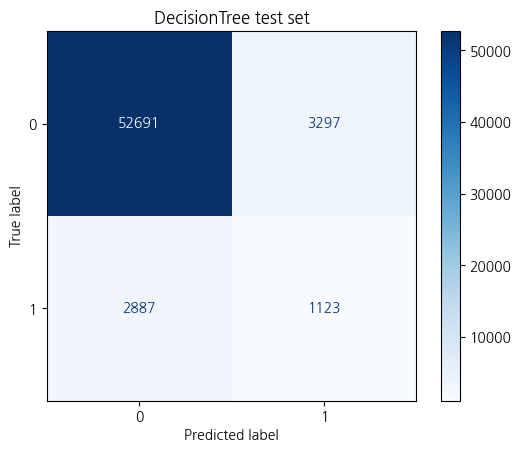

==========train==========
정확도(Accuracy): 0.9996888785181728
재현율(Recall) : 0.995844414893617
정밀도(Precision): 0.9994994994994995
F1 Score: 0.9976686094920899
AveagePrecision Score: 0.9999814263701741
ROC-AUC Score: 0.9999989895684991
==========test==========
정확도(Accuracy): 0.8969298976632555
재현율(Recall) : 0.2800498753117207
정밀도(Precision): 0.25407239819004523
F1 Score: 0.266429418742586
AveagePrecision Score: 0.11965997796560204
ROC-AUC Score: 0.6114854055829919


In [81]:
plot_confusion_matrix(y_test,pred_test, title="DecisionTree test set")
print_metrics_classification(y_train,pred_train,proba_train[:,1],'train')
print_metrics_classification(y_test,pred_test,proba_test[:,1],"test")

# under sampling 적용 후, Decision

In [82]:
tree_under= DecisionTreeClassifier(random_state=0) # 모델 생성 
tree_under.fit(X_resampled,y_resampled) # 학습 하기 

DecisionTreeClassifier(random_state=0)

In [83]:
under_pred_train=tree_under.predict(X_resampled) # undersampling
under_pred_test=tree_under.predict(X_test) # 실제 데이터
under_proba_train= tree_under.predict_proba(X_resampled)
under_proba_test= tree_under.predict_proba(X_test)

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


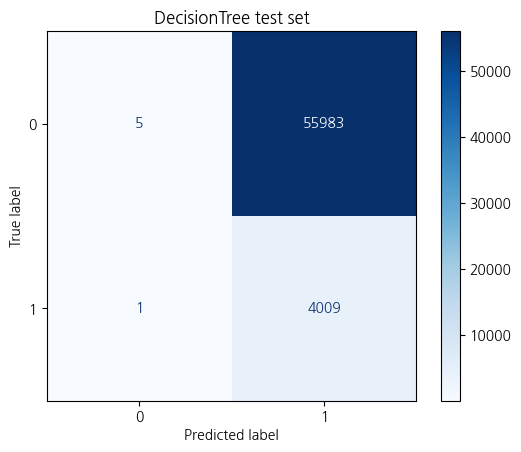

==========train==========
정확도(Accuracy): 0.9976728723404256
재현율(Recall) : 0.995844414893617
정밀도(Precision): 0.9994994994994995
F1 Score: 0.9976686094920899
AveagePrecision Score: 0.9999814263701741
ROC-AUC Score: 0.9999858947726277
==========test==========
정확도(Accuracy): 0.06690223007433581
재현율(Recall) : 0.9997506234413965
정밀도(Precision): 0.0668255767435658
F1 Score: 0.12527733508327865
AveagePrecision Score: 0.06682557923345155
ROC-AUC Score: 0.49991996414621803


In [84]:
plot_confusion_matrix(y_test, under_pred_test, title="DecisionTree test set")
print_metrics_classification(y_resampled,under_pred_train,under_proba_train[:,1],'train')
print_metrics_classification(y_test,under_pred_test,under_proba_test[:,1],"test")

# oversample, Decision 적용

In [59]:
#oversample 적용
from imblearn.over_sampling import SMOTE 


In [60]:
# SMOTE 오버샘플링 적용
smote = SMOTE()
X_over, y_over = smote.fit_resample(X_train_scaled, y_train)

In [61]:
y_over.value_counts()

SeriousDlqin2yrs
0    83981
1    83981
Name: count, dtype: int64

In [89]:
tree_over = DecisionTreeClassifier() #  결정 트리 생성
tree_over.fit(X_over, y_over)

DecisionTreeClassifier()

In [90]:
over_pred_train=tree_over.predict(X_over) # oversampling
over_pred_test=tree_over.predict(X_test_scaled) # 실제 데이터
over_proba_train= tree_over.predict_proba(X_over)
over_proba_test= tree_over.predict_proba(X_test_scaled)

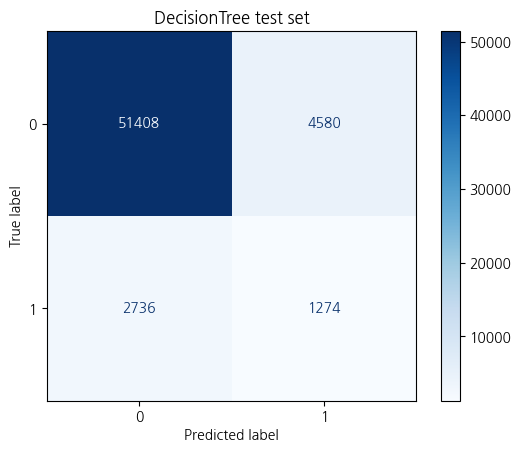

==========train==========
정확도(Accuracy): 0.9998035269882474
재현율(Recall) : 0.9997856658053608
정밀도(Precision): 0.999821381790469
F1 Score: 0.9998035234789444
AveagePrecision Score: 0.9999998619139169
ROC-AUC Score: 0.9999998878460948
==========test==========
정확도(Accuracy): 0.8780626020867363
재현율(Recall) : 0.31770573566084787
정밀도(Precision): 0.21762897164332082
F1 Score: 0.25831305758313056
AveagePrecision Score: 0.11484670711222986
ROC-AUC Score: 0.6180974877587769


In [91]:
plot_confusion_matrix(y_test, over_pred_test, title="DecisionTree test set")
print_metrics_classification(y_over,over_pred_train,over_proba_train[:,1],'train')
print_metrics_classification(y_test,over_pred_test,over_proba_test[:,1],"test")

# Grid 이용

In [548]:
tree_grid = DecisionTreeClassifier(random_state=0)  
# 파라미터 후보
params_2 = {
    "max_depth":[1,2,3], # key: 파라미터이름, value: 후보들을가지는 리스트
    "max_leaf_nodes":[3,4,5,6,7,8,9,10]
}
gs = GridSearchCV(tree_grid, #모델
                  params_2, # 파라미터 후보 딕셔너리.
                  scoring=["accuracy", "recall", "precision","roc_auc"], # 평가지표가 여러개인 경우 리스트로 묶어준다.
                  refit="roc_auc", # 순위의 기준이 되는 평가지표를 지정. 이 지표가 1등인 파라미터로 모델을 재학습 시켜서 best_estimator_에 저장한다.
                  cv=3, #cross validation시 fold의 개수
                  n_jobs=-1
                 )

# under

In [555]:
gs.fit(X_resampled,y_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'roc_auc'])

In [556]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=0)

In [557]:
under_df = pd.DataFrame(gs.cv_results_)

In [561]:
under_df.sort_values('rank_test_roc_auc').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
23,0.040135,0.001945,0.022373,0.006282,3,10,"{'max_depth': 3, 'max_leaf_nodes': 10}",0.733919,0.754255,0.771461,...,0.804275,0.814926,0.024843,1,0.785012,0.784791,0.800328,0.790044,0.007273,1
21,0.046634,0.007112,0.030001,0.000601,3,8,"{'max_depth': 3, 'max_leaf_nodes': 8}",0.733919,0.754255,0.771461,...,0.804275,0.814926,0.024843,1,0.785012,0.784791,0.800328,0.790044,0.007273,1
22,0.039162,0.000264,0.027937,0.000743,3,9,"{'max_depth': 3, 'max_leaf_nodes': 9}",0.733919,0.754255,0.771461,...,0.804275,0.814926,0.024843,1,0.785012,0.784791,0.800328,0.790044,0.007273,1


In [562]:
tree_under_best=gs.best_estimator_

In [567]:
best_under_pred_tree= tree_under_best.predict(X_test)
best_under_pred_proba_tree_test=tree_under_best.predict_proba(X_test)

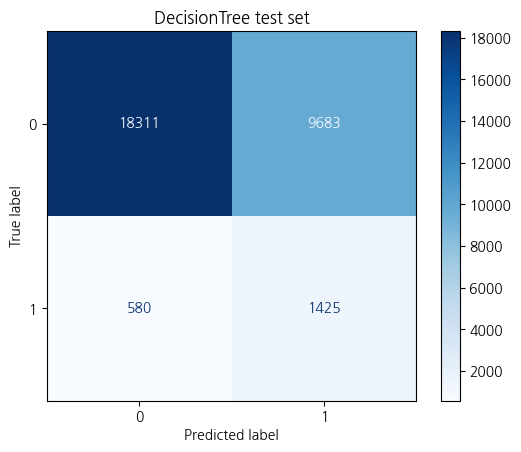

==========test==========
정확도(Accuracy): 0.6578885962865428
재현율(Recall) : 0.7107231920199502
정밀도(Precision): 0.12828592005761613
F1 Score: 0.21734156943491195
AveagePrecision Score: 0.18181690830167255
ROC-AUC Score: 0.6924251491725071


In [568]:
plot_confusion_matrix(y_test, best_under_pred_tree, title="DecisionTree test set")
print_metrics_classification(y_test,best_under_pred_tree,best_under_pred_proba_tree_test[:,1],"test")

# over

# RandomForest

In [92]:
rfc = RandomForestClassifier() # 랜덤포레스트 생성
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
pred_train2= rfc.predict(X_train)
pred_test2=rfc.predict(X_test)
proba_train2= rfc.predict_proba(X_train)
proba_test2= rfc.predict_proba(X_test)

In [147]:
rfc.feature_importances_

array([0.17567139, 0.12348659, 0.05188549, 0.17851046, 0.16178612,
       0.09196472, 0.09000926, 0.03678107, 0.04610039, 0.04380452])

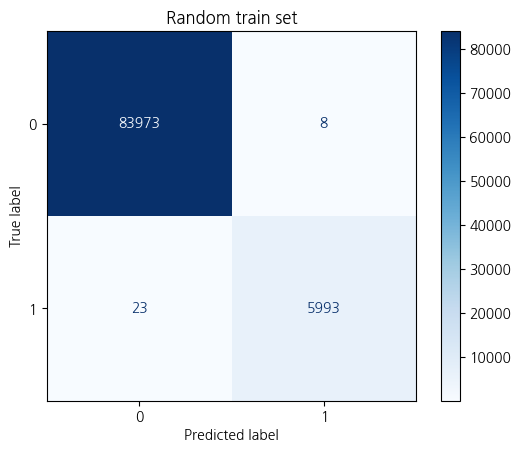

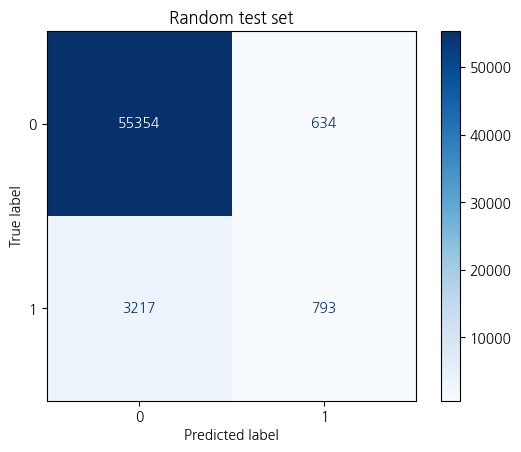

정확도(Accuracy): 0.9996555440736914
재현율(Recall) : 0.9961768617021277
정밀도(Precision): 0.9986668888518581
F1 Score: 0.9974203212116168
AveagePrecision Score: 0.9996446277573126
ROC-AUC Score: 0.999978278196854
정확도(Accuracy): 0.9358145271509051
재현율(Recall) : 0.19775561097256858
정밀도(Precision): 0.5557112824106517
F1 Score: 0.29170498436637854
AveagePrecision Score: 0.36121699467798063
ROC-AUC Score: 0.842369316937705


In [94]:
plot_confusion_matrix(y_train, pred_train2, title="Random train set")
plot_confusion_matrix(y_test, pred_test2, title="Random test set")
print_metrics_classification(y_train,pred_train2,proba_train2[:,1])
print_metrics_classification(y_test,pred_test2,proba_test2[:,1])

In [378]:
TN=27651
FP=343
FN=1615
TP=390

In [499]:
TP/(TP+FP)

0.5320600272851296

In [382]:
(TP+TN)/(TN+TP+FN+FP)

0.9347311577052568

In [383]:
TP/(TP+FN) # 재현율 실제 양성인데 모델이 양성으로 잘예측을못함ㄴ 

0.19451371571072318

In [493]:
from metrics import plot_roc_curve

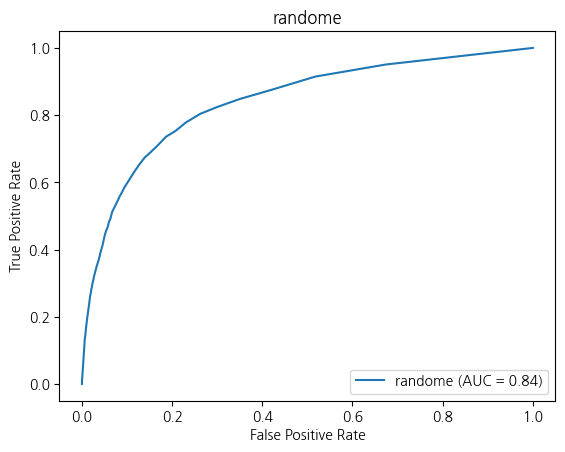

In [494]:
plot_roc_curve(y_test,proba_test2[:,1],"randome","randome")

In [496]:
pd.Series(rfc.feature_importances_, index=X.columns)

RevolvingUtilizationOfUnsecuredLines    0.176011
age                                     0.123525
NumberOfTime30-59DaysPastDueNotWorse    0.051773
DebtRatio                               0.179692
MonthlyIncome                           0.161968
NumberOfOpenCreditLinesAndLoans         0.090786
NumberOfTimes90DaysLate                 0.089284
NumberRealEstateLoansOrLines            0.035519
NumberOfTime60-89DaysPastDueNotWorse    0.048246
NumberOfDependents                      0.043195
dtype: float64

# 아무것도 RandomForest 

In [95]:
rfc= RandomForestClassifier(random_state=0) # 모델 생성 
rfc.fit(X_train,y_train) # 학습 하기 

RandomForestClassifier(random_state=0)

In [96]:
pred_train2=rfc.predict(X_train) # undersampling
pred_test2=rfc.predict(X_test) # 실제 데이터
proba_train2= rfc.predict_proba(X_train)
proba_test2= rfc.predict_proba(X_test)

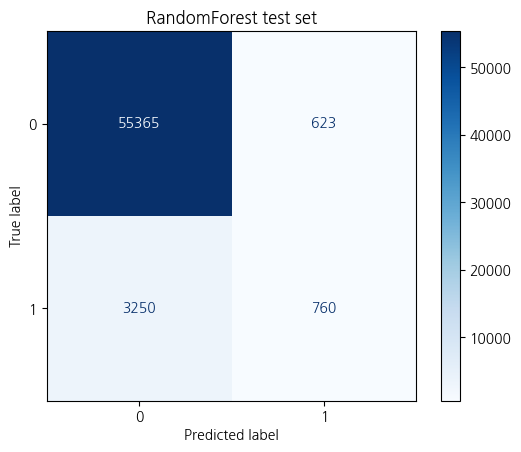

==========train==========
정확도(Accuracy): 0.9996222096292099
재현율(Recall) : 0.9956781914893617
정밀도(Precision): 0.9986662220740247
F1 Score: 0.9971699683702346
AveagePrecision Score: 0.999624936172699
ROC-AUC Score: 0.9999751627821971
==========test==========
정확도(Accuracy): 0.9354478482616088
재현율(Recall) : 0.18952618453865336
정밀도(Precision): 0.549530007230658
F1 Score: 0.2818468384943445
AveagePrecision Score: 0.3558008003074925
ROC-AUC Score: 0.8377736291727637


In [97]:
plot_confusion_matrix(y_test, pred_test2, title="RandomForest test set")
print_metrics_classification(y_train,pred_train2,proba_train2[:,1],'train')
print_metrics_classification(y_test,pred_test2,proba_test2[:,1],"test")

# Undersampling 적용후, RandomForest 

In [98]:
rfc_under= RandomForestClassifier(random_state=0) # 모델 생성 
rfc_under.fit(X_resampled,y_resampled) # 학습 하기 

RandomForestClassifier(random_state=0)

In [99]:
under_pred_train2=rfc_under.predict(X_resampled) # undersampling
under_pred_test2=rfc_under.predict(X_test_scaled) # 실제 데이터
under_proba_train2= rfc_under.predict_proba(X_resampled)
under_proba_test2= rfc_under.predict_proba(X_test_scaled)

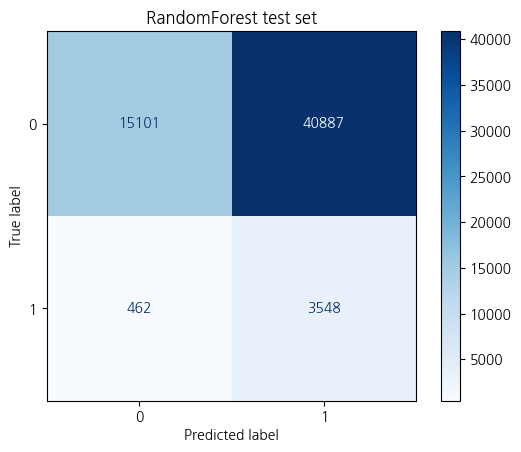

==========train==========
정확도(Accuracy): 0.9976728723404256
재현율(Recall) : 0.9966755319148937
정밀도(Precision): 0.9986675549633578
F1 Score: 0.9976705490848586
AveagePrecision Score: 0.9998642802545913
ROC-AUC Score: 0.9998531868253805
==========test==========
정확도(Accuracy): 0.31082702756758557
재현율(Recall) : 0.884788029925187
정밀도(Precision): 0.07984696748058963
F1 Score: 0.14647538445660027
AveagePrecision Score: 0.139893758853478
ROC-AUC Score: 0.6807565127511293


In [100]:
plot_confusion_matrix(y_test, under_pred_test2, title="RandomForest test set")
print_metrics_classification(y_resampled,under_pred_train2,under_proba_train2[:,1],'train')
print_metrics_classification(y_test,under_pred_test2,under_proba_test2[:,1],"test")

# oversampling 적용후, RandomForest

In [101]:
rfc_over= RandomForestClassifier(random_state=0) # 모델 생성 
rfc_over.fit(X_over,y_over) # 학습 하기 

RandomForestClassifier(random_state=0)

In [104]:
over_pred_train2=rfc_over.predict(X_over) # undersampling
over_pred_test2=rfc_over.predict(X_test_scaled) # 실제 데이터
over_proba_train2= rfc_under.predict_proba(X_over)
over_proba_test2= rfc_over.predict_proba(X_test_scaled)

In [146]:
rfc.feature_importances_

array([0.17567139, 0.12348659, 0.05188549, 0.17851046, 0.16178612,
       0.09196472, 0.09000926, 0.03678107, 0.04610039, 0.04380452])

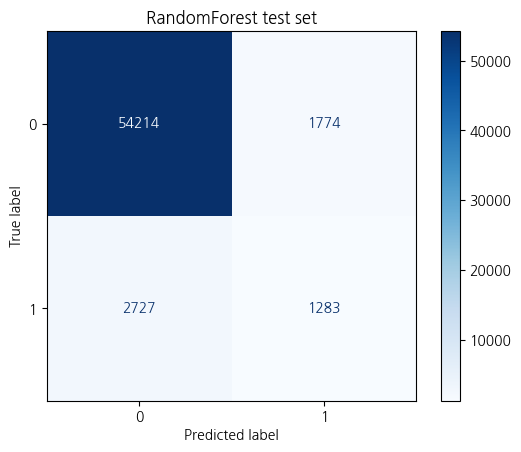

==========train==========
정확도(Accuracy): 0.9997797120777319
재현율(Recall) : 0.9998571105369072
정밀도(Precision): 0.999702359692359
F1 Score: 0.999779729126358
AveagePrecision Score: 0.7019133290857167
ROC-AUC Score: 0.7185149512245481
==========test==========
정확도(Accuracy): 0.9249808326944231
재현율(Recall) : 0.3199501246882793
정밀도(Precision): 0.41969250899574745
F1 Score: 0.3630960803735673
AveagePrecision Score: 0.32815290743952574
ROC-AUC Score: 0.8335409288809127


In [105]:
plot_confusion_matrix(y_test, over_pred_test2, title="RandomForest test set")
print_metrics_classification(y_over,over_pred_train2,over_proba_train2[:,1],'train')
print_metrics_classification(y_test,over_pred_test2,over_proba_test2[:,1],"test")

# Boost 이용

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gs=GradientBoostingClassifier(random_state=0)
gs.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [109]:
gs_pred_train=gs.predict(X_train)
gs_pred_test=gs.predict(X_test)
gs_pred_proba_train=gs.predict_proba(X_train)
gs_pred_proba_test=gs.predict_proba(X_test)

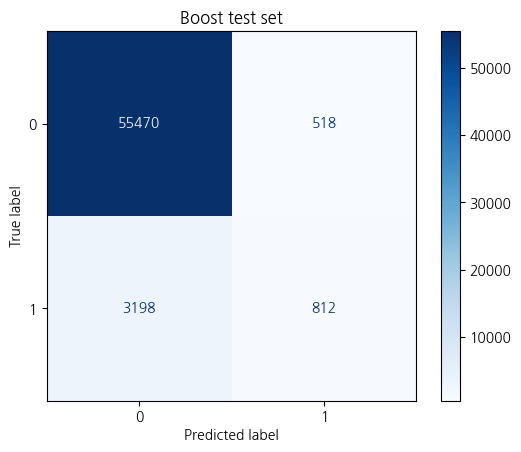

==========train==========
정확도(Accuracy): 0.9383423891907507
재현율(Recall) : 0.19664228723404256
정밀도(Precision): 0.6229594523433386
F1 Score: 0.2989260897030954
AveagePrecision Score: 0.4232758929932431
ROC-AUC Score: 0.8692025300112208
==========test==========
정확도(Accuracy): 0.9380646021534051
재현율(Recall) : 0.2024937655860349
정밀도(Precision): 0.6105263157894737
F1 Score: 0.3041198501872659
AveagePrecision Score: 0.41000759686400745
ROC-AUC Score: 0.8650036893370632


In [110]:
plot_confusion_matrix(y_test, gs_pred_test, title="Boost test set")
print_metrics_classification(y_train,gs_pred_train,gs_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,gs_pred_test,gs_pred_proba_test[:,1],"test")

# Boost - under sampling

In [116]:
gs_under=GradientBoostingClassifier(random_state=0)# 모델 생성 
gs_under.fit(X_resampled,y_resampled) # 학습 하기 

GradientBoostingClassifier(random_state=0)

In [113]:
y_resampled.value_counts()

SeriousDlqin2yrs
0    6016
1    6016
Name: count, dtype: int64

In [117]:
gs_under_pred_train=gs_under.predict(X_resampled)
gs_under_pred_test=gs_under.predict(X_test_scaled)
gs_under_pred_proba_train=gs_under.predict_proba(X_resampled)
gs_under_pred_proba_test=gs_under.predict_proba(X_test_scaled)

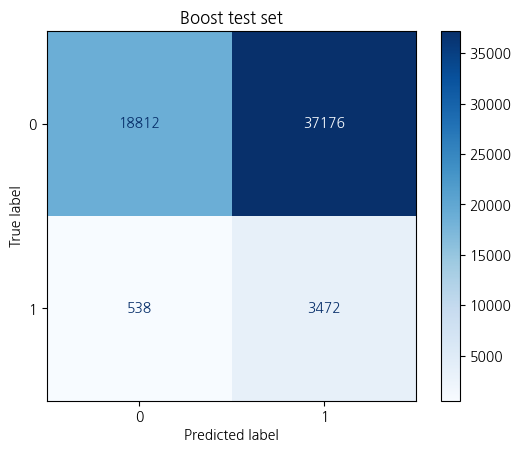

==========train==========
정확도(Accuracy): 0.8887134308510638
재현율(Recall) : 0.8648603723404256
정밀도(Precision): 0.9081864199685808
F1 Score: 0.8859940400170285
AveagePrecision Score: 0.9625594294039264
ROC-AUC Score: 0.9544363993225511
==========test==========
정확도(Accuracy): 0.37141238041268043
재현율(Recall) : 0.8658354114713217
정밀도(Precision): 0.08541625664239323
F1 Score: 0.15549285682296565
AveagePrecision Score: 0.15782545108517557
ROC-AUC Score: 0.696233442078878


In [119]:
plot_confusion_matrix(y_test, gs_under_pred_test, title="Boost test set")
print_metrics_classification(y_resampled,gs_under_pred_train,gs_under_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,gs_under_pred_test,gs_under_pred_proba_test[:,1],"test")

# boost oversampling

In [121]:
gs_over=GradientBoostingClassifier(random_state=0)# 모델 생성 
gs_over.fit(X_over,y_over) # 학습 하기 

GradientBoostingClassifier(random_state=0)

In [122]:
y_over.value_counts()

SeriousDlqin2yrs
0    83981
1    83981
Name: count, dtype: int64

In [123]:
gs_over_pred_train=gs_over.predict(X_over)
gs_over_pred_test=gs_over.predict(X_test_scaled)
gs_over_pred_proba_train=gs_over.predict_proba(X_over)
gs_over_pred_proba_test=gs_over.predict_proba(X_test_scaled)

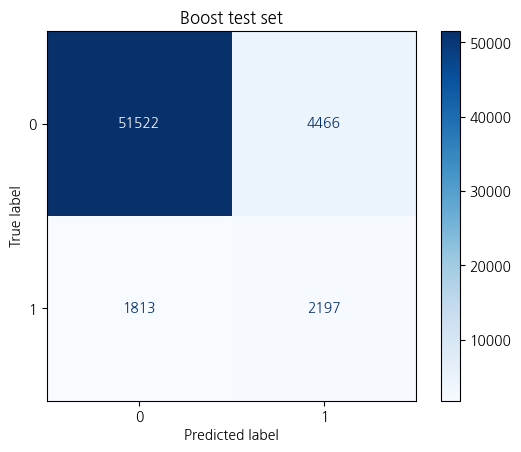

==========train==========
정확도(Accuracy): 0.8843726557197461
재현율(Recall) : 0.8481799454638549
정밀도(Precision): 0.9143667685040179
F1 Score: 0.8800306394124152
AveagePrecision Score: 0.960259850468351
ROC-AUC Score: 0.9534867317090285
==========test==========
정확도(Accuracy): 0.895346511550385
재현율(Recall) : 0.5478802992518703
정밀도(Precision): 0.32973135224373407
F1 Score: 0.41169305724725946
AveagePrecision Score: 0.37191364571883284
ROC-AUC Score: 0.8567439037079019


In [124]:
plot_confusion_matrix(y_test, gs_over_pred_test, title="Boost test set")
print_metrics_classification(y_over,gs_over_pred_train,gs_over_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,gs_over_pred_test,gs_over_pred_proba_test[:,1],"test")

In [125]:
# Xgboost 적용

In [129]:
from xgboost import XGBClassifier,XGBRegressor

xgb=XGBClassifier(n_estimators=500,learning_rate=0.01, max_depth=3, random_state=0)

# 기본

In [130]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [131]:
xgb_pred_train=xgb.predict(X_train)
xgb_pred_test=xgb.predict(X_test)
xgb_pred_proba_train=xgb.predict_proba(X_train)
xgb_pred_proba_test=xgb.predict_proba(X_test)

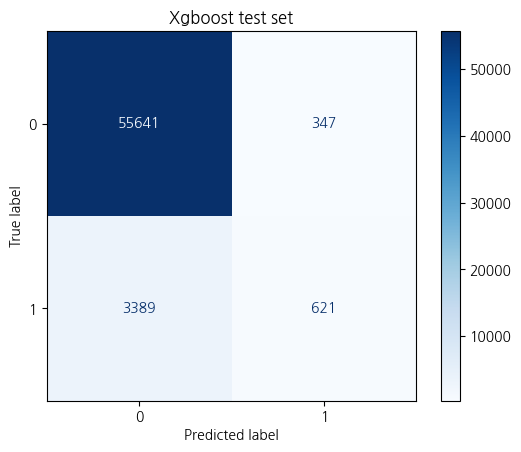

==========train==========
정확도(Accuracy): 0.9371201262264298
재현율(Recall) : 0.14710771276595744
정밀도(Precision): 0.6263269639065817
F1 Score: 0.23825548526046572
AveagePrecision Score: 0.3972609828486691
ROC-AUC Score: 0.86172624144405
==========test==========
정확도(Accuracy): 0.9377312577085903
재현율(Recall) : 0.15486284289276808
정밀도(Precision): 0.6415289256198347
F1 Score: 0.24949779027721977
AveagePrecision Score: 0.4004939081112201
ROC-AUC Score: 0.8603882565145329


In [133]:
plot_confusion_matrix(y_test, xgb_pred_test, title="Xgboost test set")
print_metrics_classification(y_train,xgb_pred_train,xgb_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,xgb_pred_test,xgb_pred_proba_test[:,1],"test")

# undersample

In [136]:
xgb_under=XGBClassifier(n_estimators=500,learning_rate=0.01, max_depth=3, random_state=0)
xgb_under.fit(X_resampled,y_resampled) # 학습 하기 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [137]:
xgb_under_pred_train=xgb_under.predict(X_resampled)
xgb_under_pred_test=xgb_under.predict(X_test_scaled)
xgb_under_pred_proba_train=xgb_under.predict_proba(X_resampled)
xgb_under_pred_proba_test=xgb_under.predict_proba(X_test_scaled)

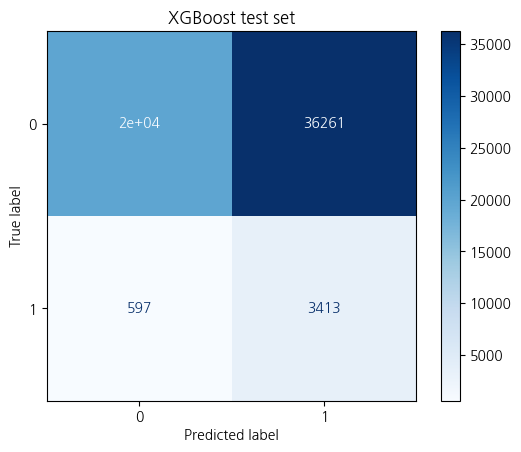

==========train==========
정확도(Accuracy): 0.8798204787234043
재현율(Recall) : 0.8523936170212766
정밀도(Precision): 0.9018642279282448
F1 Score: 0.87643137925141
AveagePrecision Score: 0.9566006571646903
ROC-AUC Score: 0.948048706883594
==========test==========
정확도(Accuracy): 0.385679522650755
재현율(Recall) : 0.8511221945137157
정밀도(Precision): 0.08602611281947875
F1 Score: 0.1562585843787199
AveagePrecision Score: 0.1627962590344116
ROC-AUC Score: 0.6948076311151108


In [138]:
plot_confusion_matrix(y_test, xgb_under_pred_test, title="XGBoost test set")
print_metrics_classification(y_resampled,xgb_under_pred_train,xgb_under_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,xgb_under_pred_test,xgb_under_pred_proba_test[:,1],"test")

# oversampling

In [140]:
xgb_over=XGBClassifier(n_estimators=500,learning_rate=0.01, max_depth=3, random_state=0)
xgb_over.fit(X_over,y_over) # 학습 하기 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [62]:
X_over.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [141]:
xgb_over_pred_train=xgb_over.predict(X_over)
xgb_over_pred_test=xgb_over.predict(X_test_scaled)
xgb_over_pred_proba_train=xgb_over.predict_proba(X_over)
xgb_over_pred_proba_test=xgb_over.predict_proba(X_test_scaled)

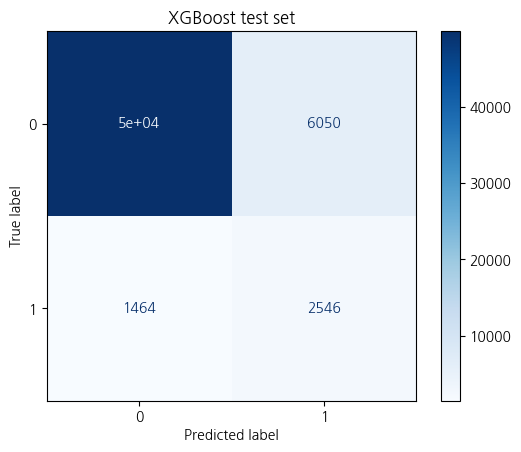

==========train==========
정확도(Accuracy): 0.8562829687667448
재현율(Recall) : 0.8225908241149784
정밀도(Precision): 0.8820254845381885
F1 Score: 0.8512720035982083
AveagePrecision Score: 0.9413734280357868
ROC-AUC Score: 0.9315486554732434
==========test==========
정확도(Accuracy): 0.8747624920830694
재현율(Recall) : 0.6349127182044888
정밀도(Precision): 0.29618427175430434
F1 Score: 0.4039346343011265
AveagePrecision Score: 0.3798296573753944
ROC-AUC Score: 0.8599339932479297


In [142]:
plot_confusion_matrix(y_test, xgb_over_pred_test, title="XGBoost test set")
print_metrics_classification(y_over,xgb_over_pred_train,xgb_over_pred_proba_train[:,1],'train')
print_metrics_classification(y_test,xgb_over_pred_test,xgb_over_pred_proba_test[:,1],"test")

In [148]:
df=pd.Series(xgb_over.feature_importances_,X.columns)
df

RevolvingUtilizationOfUnsecuredLines    0.181826
age                                     0.046241
NumberOfTime30-59DaysPastDueNotWorse    0.348448
DebtRatio                               0.046466
MonthlyIncome                           0.025460
NumberOfOpenCreditLinesAndLoans         0.053707
NumberOfTimes90DaysLate                 0.165145
NumberRealEstateLoansOrLines            0.023414
NumberOfTime60-89DaysPastDueNotWorse    0.109293
NumberOfDependents                      0.000000
dtype: float32

RevolvingUtilizationOfUnsecuredLines    0.181826
age                                     0.046241
NumberOfTime30-59DaysPastDueNotWorse    0.348448
DebtRatio                               0.046466
MonthlyIncome                           0.025460
NumberOfOpenCreditLinesAndLoans         0.053707
NumberOfTimes90DaysLate                 0.165145
NumberRealEstateLoansOrLines            0.023414
NumberOfTime60-89DaysPastDueNotWorse    0.109293
NumberOfDependents                      0.000000
dtype: float32